### Classifying cells based on inflextion point threshold

In [16]:
#Classify the cells based on where their cd73 expression intensity falls compared 
#to the inflection point threshold calculated in find_inflection_point.ipynb

import pandas as pd
import numpy as np

# Read the excel file
file_path = '/Users/pegaheizad/Desktop/Ghosh_lab/cd105_intensities/data_files'
df = pd.read_excel(f'{file_path}/MyExpt_cells_filtered.xlsx')

# inflection point intensity or threshold set based off of histograms
threshold = 0.3858273899640524

# sort values based on the threshold
above_threshold = df[df['Intensity_MeanIntensity_cd105_img'] > threshold]
below_or_equal_threshold = df[df['Intensity_MeanIntensity_cd105_img'] <= threshold]

# Print results to check
print(f"how many values above the threshold:\n{len(above_threshold)}")
print(f"how many values below or equal to the threshold:\n{len(below_or_equal_threshold)}")


how many values above the threshold:
2949
how many values below or equal to the threshold:
4622


In [18]:
# take a segment of the data for the ML
above_threshold_data_for_ML = above_threshold
below_or_equal_threshold_data_for_ML = below_or_equal_threshold.head(3000)

combined_data = pd.concat([above_threshold_data_for_ML, below_or_equal_threshold_data_for_ML])
combined_data.to_excel("/Users/pegaheizad/Desktop/Ghosh_lab/cd105_intensities/data_files/ML_data_intensity_classified.xlsx", index=False)

### (Normalized) Classify based in P5 527 & not 

In [9]:
p5soft_data = df[df['Metadata_FileLocation'].str.contains('P5_soft')]
not_p5_soft = df[~df['Metadata_FileLocation'].str.contains('P5_soft')].sample(n=932, random_state=1)

combined_data = pd.concat([p5soft_data, not_p5_soft])
combined_data.to_excel(f'{file_path}/ML_data_p5soft_vs_not.xlsx', index=False)


### (Normalized) P5 527 vs TCP

In [7]:
p5soft_data = df[df['Metadata_FileLocation'].str.contains('P5_soft')]
p5_TCP = df[df['Metadata_FileLocation'].str.contains('P5_TCP')].head(1000)

# print(len(p5soft_data))
# print(len(p5_TCP))

combined_data = pd.concat([p5soft_data, p5_TCP])
combined_data.to_excel(f'{file_path}/ML_data_p5soft_vs_TCP.xlsx', index=False)

### (Normalized) P5 vs P3

In [17]:
p5 = df[df['Metadata_FileLocation'].str.contains('P5')].sample(n=2105, random_state=1)
p3 = df[df['Metadata_FileLocation'].str.contains('P3')].sample(n=2500, random_state=1)

print(len(p5))
print(len(p3))

combined_data = pd.concat([p5, p3])
combined_data.to_excel(f'{file_path}/ML_data_p5_vs_P3.xlsx', index=False)

2105
2500


## Classify based on intensity threshold and make the two groups the highest and lowest intensities

### Highest and lowest 1921 

In [15]:
highest = above_threshold.sort_values(by='Normalized_Intensities', ascending=False)
lowest = below_or_equal_threshold.sort_values(by='Normalized_Intensities', ascending=True).head(500)

# Concatenate the two datasets
combined_data = pd.concat([highest, lowest])

# Write the combined data into an Excel file
combined_data.to_excel(f'{file_path}/ML_normalized_highest_vs_lowest_intensities.xlsx', index=False)

In [5]:
# Concatenate the two datasets
combined_data = pd.concat([above_threshold_data_for_ML, below_or_equal_threshold_data_for_ML])

# Write the combined data into an Excel file
combined_data.to_excel("/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_threshold_sorted.xlsx", index=False)

## Classsify based on growing surface

In [8]:
# classify based on soft vs TCP 
soft = df[df['Metadata_GrowingSurface'] == 'soft']
tcp = df[df['Metadata_GrowingSurface'] == 'TCP']

# print results to check
print(f'how many values in the soft category: {len(soft)}')
print(f'how many values in the TCP category: {len(tcp)}')

soft_data_for_ML = soft.head(5500)
tcp_data_for_ML = tcp.head(5000)

combined_data = pd.concat([soft_data_for_ML, tcp_data_for_ML])
combined_data.to_excel('/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_growing_surface_sorted.xlsx', index=False)

how many values in the soft category: 10753
how many values in the TCP category: 5739


### P5 527 vs P5 TCP

In [35]:
# classify based on soft vs TCP 
p5_soft = df[(df['Metadata_Passage'] == 5) & (df['Metadata_GrowingSurface'] == 'soft')]
p5_tcp = df[(df['Metadata_Passage'] == 5) & (df['Metadata_GrowingSurface'] == 'TCP')]

# print results to check
print(f'how many values in the soft category: {len(p5_soft)}')
print(f'how many values in the TCP category: {len(p5_tcp)}')

p5_soft_data_for_ML = p5_soft.head(2000)
p5_tcp_data_for_ML = p5_tcp.head(2150)

combined_data = pd.concat([p5_soft_data_for_ML, p5_tcp_data_for_ML])
combined_data.to_excel('/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_p5_growing_surface_sorted.xlsx', index=False)

how many values in the soft category: 6567
how many values in the TCP category: 2150


### P3 527 vs TCP

In [34]:
# classify based on soft vs TCP 
p3_soft = df[(df['Metadata_Passage'] == 3) & (df['Metadata_GrowingSurface'] == 'soft')]
p3_tcp = df[(df['Metadata_Passage'] == 3) & (df['Metadata_GrowingSurface'] == 'TCP')]

# print results to check
print(f'how many values in the soft category: {len(p3_soft)}')
print(f'how many values in the TCP category: {len(p3_tcp)}')

p3_soft_data_for_ML = p3_soft.head(3500)
p3_tcp_data_for_ML = p3_tcp.head(3589)

combined_data = pd.concat([p3_soft_data_for_ML, p3_tcp_data_for_ML])
combined_data.to_excel('/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_p3_growing_surface_sorted.xlsx', index=False)

how many values in the soft category: 4186
how many values in the TCP category: 3589


### Classifying cells based on passage

In [12]:
# classify based on P3 vs P5 
p3 = df[df['Metadata_Passage'] == 3]
p5 = df[df['Metadata_Passage'] == 5]

# print results to check
print(f'how many values in the P3 category: {len(p3)}')
print(f'how many values in the P5 category: {len(p5)}')

p3_data_for_ML = p3.head(7500)
p5_data_for_ML = p5.head(8000)

combined_data = pd.concat([p3_data_for_ML, p5_data_for_ML])
combined_data.to_excel('/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_passage_sorted.xlsx', index=False)

how many values in the P3 category: 7775
how many values in the P5 category: 8717


### TCP P5 vs P3

In [17]:
p5_tcp = df[(df['Metadata_GrowingSurface'] == 'TCP') & (df['Metadata_Passage'] == 5)]
p3_tcp = df[(df['Metadata_GrowingSurface'] == 'TCP') & (df['Metadata_Passage'] == 3)]

# print results to check
print(f'how many values in the P3 category: {len(p5_tcp)}')
print(f'how many values in the P5 category: {len(p3_tcp)}')

p5TCP_data_for_ML = p5_tcp.head(2100)
p3TCP_data_for_ML = p3_tcp.head(2500)

combined_data = pd.concat([p5TCP_data_for_ML, p3TCP_data_for_ML])
combined_data.to_excel('/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_p5tcp_p3tcp.xlsx', index=False)


how many values in the P3 category: 2150
how many values in the P5 category: 3589


In [19]:
p5_527 = df[(df['Metadata_GrowingSurface'] == 'soft') & (df['Metadata_Passage'] == 5)]
p3_527 = df[(df['Metadata_GrowingSurface'] == 'soft') & (df['Metadata_Passage'] == 3)]

# print results to check
print(f'how many values in the P3 category: {len(p5_527)}')
print(f'how many values in the P5 category: {len(p3_527)}')

p5_527_data_for_ML = p5_527.head(4100)
p3_527_data_for_ML = p3_527.head(4000)

combined_data = pd.concat([p5_527_data_for_ML, p3_527_data_for_ML])
combined_data.to_excel('/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_p5soft_p3soft.xlsx', index=False)

how many values in the P3 category: 6567
how many values in the P5 category: 4186


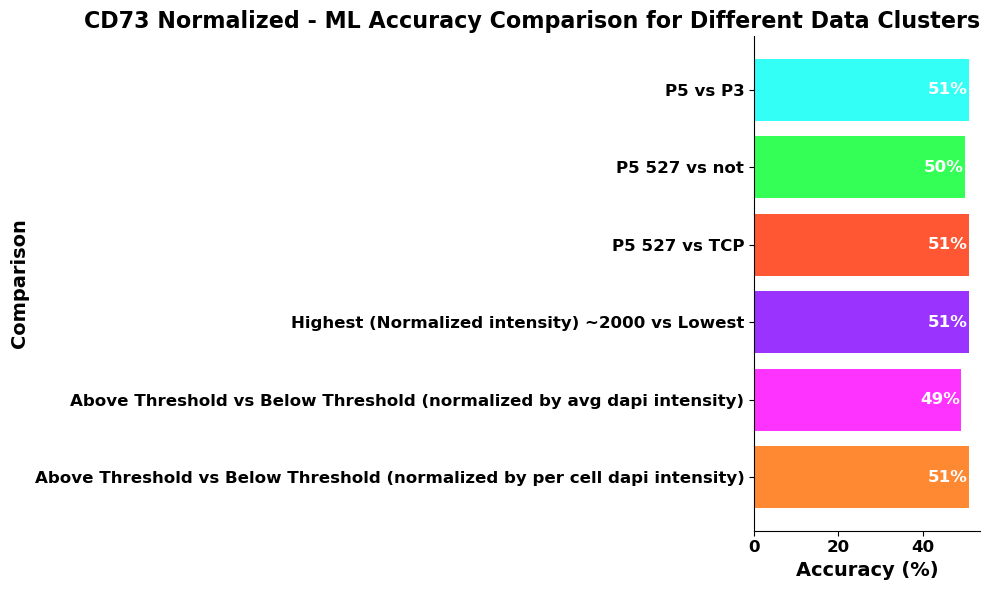

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data, including the new group
new_data = {
    'Comparison': ['Above Threshold vs Below Threshold (normalized by per cell dapi intensity)', 'Above Threshold vs Below Threshold (normalized by avg dapi intensity)', 'Highest (Normalized intensity) ~2000 vs Lowest', 'P5 527 vs TCP', 'P5 527 vs not', 'P5 vs P3'],
    'Accuracy': [51, 49, 51, 51, 50, 51]
}

# Create a DataFrame with the new group
df_new = pd.DataFrame(new_data)

# Sort the DataFrame by Accuracy
# df_new = df_new.sort_values(by='Accuracy')

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_new['Comparison'], df_new['Accuracy'], color=['#FF8833','#FF33FF', '#9B33FF', '#FF5733', '#33FF57', '#33FFF7'])

# Add larger and bold labels with the new title
plt.xlabel('Accuracy (%)', fontsize=14, fontweight='bold')
plt.ylabel('Comparison', fontsize=14, fontweight='bold')
plt.title('CD73 Normalized - ML Accuracy Comparison for Different Data Clusters', fontsize=16, fontweight='bold', loc='right')

# Set the y-tick labels (comparisons) to bold
plt.yticks(fontsize=12, fontweight='bold')

# Set the x-tick labels (numbers) to bold
plt.xticks(fontsize=12, fontweight='bold')

# Display the values on the bars with bold font
for bar in bars:
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height()/2, f'{bar.get_width()}%', va='center', ha='center', 
             color='white', fontsize=12, fontweight='bold')

# Add a dotted red line between the two groups
# plt.axhline(y=1.5, color='red', linestyle='--', linewidth=2)

# Remove the black border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Show the plot
plt.tight_layout()
plt.show()
